In [39]:
# 加这行不需要再写plt.show()，就可以直接显示图像出来
%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
display_columns = ["title","read_num","like_num","comment_num","reward_num","p_date"]

In [40]:
# 从csv文件中加载
df = pd.read_csv(".\\data_set\\wxpost.csv")
# 重新设置列的顺序
df = df.reindex(columns=display_columns)
# 将p_date的数据类型从timestamp 转换成 datetime
df.p_date = pd.to_datetime(df['p_date'])
df.head()

,title,read_num,like_num,comment_num,reward_num,p_date
0,为什么我推荐你学习数据分析,3549,22,0,0,2018-01-15 19:59:14+00:00
1,推荐几个公众号（文末彩蛋）,4866,37,0,0,2018-01-12 12:13:55+00:00
2,普通程序员的逆袭：如何学习数据挖掘与人工智能,3582,14,0,0,2018-01-11 21:06:24+00:00
3,这10个题，有 68% 的人答不对,3643,49,0,1,2018-01-10 07:31:18+00:00
4,Python知识冲顶大会,5308,30,0,0,2018-01-08 08:00:00+00:00


In [41]:
df.describe()

,read_num,like_num,comment_num,reward_num
count,203.000000,203.000000,203.0,203.000000
mean,2404.694581,31.891626,0.0,2.551724
std,2005.320602,31.026467,0.0,7.322895
min,124.000000,0.000000,0.0,0.000000
25%,1032.500000,8.500000,0.0,0.000000
50%,1844.000000,25.000000,0.0,0.000000
75%,3498.000000,43.500000,0.0,3.000000
max,8628.000000,190.000000,0.0,83.000000


In [42]:
df.read_num.sum()

488153

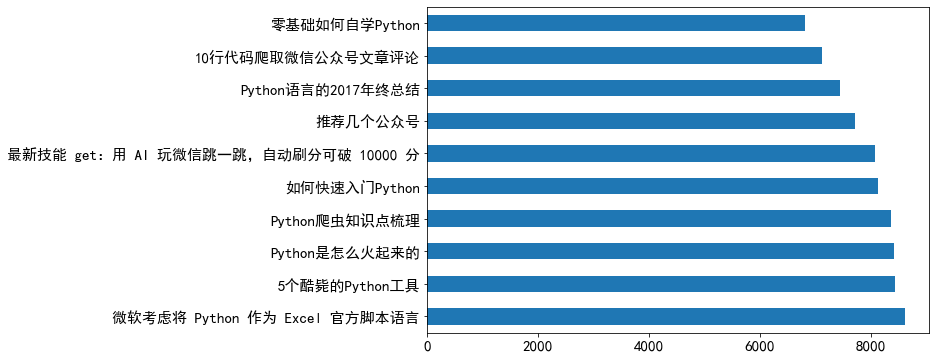

In [43]:
# 根据阅读数排序，ascending 表示降序排列
top_read_num_10 = df.sort_values(by=['read_num'], ascending=False)[:10]
top_read_num_10 = top_read_num_10[display_columns]
# 重置行索引，drop 表示删除原来的行索引
top_read_num_10.reset_index(drop=True)
ax = top_read_num_10.plot(x='title', y='read_num', kind='barh', figsize=(9,6), fontsize=15) 
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend().set_visible(False)

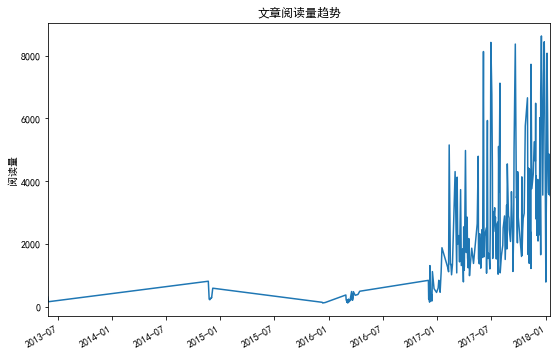

In [44]:
# 历史文章阅读量变化曲线
ax = df.plot(y='read_num', x='p_date', title="文章阅读量趋势",figsize=(9,6))
# 设置y轴标签
ax.set_ylabel("阅读量")
# 设置x轴标签
ax.set_xlabel("")
# 隐藏图例
ax.legend().set_visible(False)

In [45]:
# 按年分组统计每年写文章的数量
year_df=df.groupby(df.p_date.dt.year).size().reset_index(name='total')
year_df

,p_date,total
0,2013,2
1,2014,6
2,2015,3
3,2016,34
4,2017,149
5,2018,9


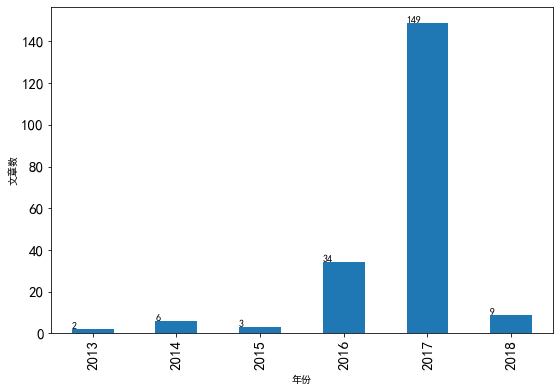

In [46]:
ax = year_df.plot(x='p_date', y='total', kind='bar', figsize=(9,6), fontsize=15)
ax.set_ylabel("文章数")
ax.set_xlabel("年份")
ax.legend().set_visible(False)
# 柱状图上显示数字
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

In [47]:
# 得到文章赞赏数前10的数据
top_reward_num = df.sort_values(by=['reward_num'], ascending=False)[:10]
top_reward_num = top_reward_num[display_columns]
top_reward_num
top_reward_num.reset_index(drop=True)

,title,read_num,like_num,comment_num,reward_num,p_date
0,自学Python编程怎么学才不那么孤独,5763,100,0,83,2017-10-24 08:36:40+00:00
1,2018 年，学点人工智能（赠书8本）,6353,137,0,45,2017-12-29 08:00:00+00:00
2,【福利】写在5000订阅读者时,1246,58,0,34,2017-04-14 18:24:18+00:00
3,11月赠书，总共10本，附Python书单,6485,190,0,16,2017-11-28 08:00:00+00:00
4,如何快速入门Python,8132,123,0,13,2017-06-05 08:47:48+00:00
5,[荐书|福利] 如何系统学习网络爬虫,4305,76,0,10,2017-09-28 17:16:31+00:00
6,2017半年文章合集（建议收藏）,3031,37,0,10,2017-07-09 09:25:45+00:00
7,初级Python程序员如何进阶？,4798,115,0,10,2017-05-18 17:09:30+00:00
8,2017年3月写字总结,1286,52,0,9,2017-04-02 01:35:01+00:00
9,Python进阶好书推荐，还有送书,5110,141,0,9,2017-07-26 07:30:00+00:00


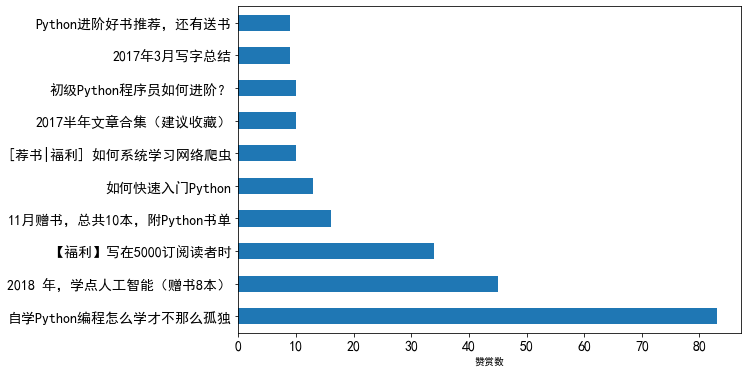

In [48]:
ax = top_reward_num.plot(x='title',
                         y='reward_num', 
                         kind='barh', 
                         figsize=(9,6),
                         fontsize=14)
ax.set_ylabel("")
ax.set_xlabel("赞赏数")
ax.legend().set_visible(False)

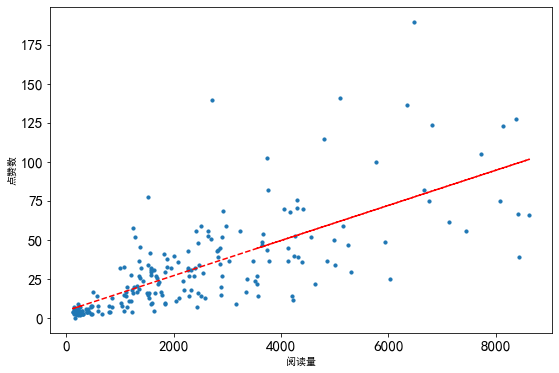

In [49]:
# 散点图
ax = df.plot(kind="scatter", y='like_num', x='read_num',s=10, figsize=(9,6), fontsize=15)
ax.set_xlabel("阅读量")
ax.set_ylabel("点赞数")

z = np.polyfit(df.read_num, df.like_num, 1)
p = np.poly1d(z)
plt.plot(df.read_num,p(df.read_num),"r--")

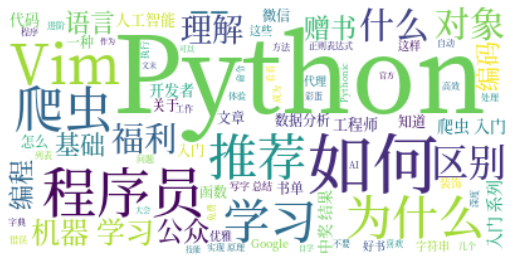

In [50]:
from wordcloud import WordCloud
import jieba

words=[]
for i in df.title:
    seg_list=jieba.cut(i,cut_all=False)
    words.append(' '.join(seg_list))
wordcloud= WordCloud(font_path='C:\\Windows\\Fonts\\SourceHanSerif-Medium.ttc',background_color='white',max_words=80,).generate(' '.join(words))
plt.figure(figsize=(9,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
